In [173]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

In [92]:
#Importng dataset
!wget "https://raw.githubusercontent.com/ramahanisha-7/Datasets/main/dataset_new.csv"

--2021-09-27 16:14:04--  https://raw.githubusercontent.com/ramahanisha-7/Datasets/main/dataset_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6164 (6.0K) [text/plain]
Saving to: ‘dataset_new.csv.1’

dataset_new.csv.1   100%[===================>]   6.02K  --.-KB/s    in 0s      

2021-09-27 16:14:04 (49.4 MB/s) - ‘dataset_new.csv.1’ saved [6164/6164]



In [93]:
# Read the data 
data = pd.read_csv("dataset_new.csv")
data.head()

,Hour,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic
0,07:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,07:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,08:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,08:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,09:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [94]:
#Encoding for hour feature
data['Hour'].replace(["07:00","07:30","08:00","08:30","09:30","09:00","10:00","10:30","11:00","11:30"], 'morning', inplace =True)
data['Hour'].replace(["12:00","12:30","13:00","13:30","14:30","14:00","15:00","15:30","16:00","16:30"], 'afternoon', inplace =True)
data['Hour'].replace(["17:00","17:30","18:00","18:30","19:30","19:00"], 'evening', inplace =True)
data['Hour'].replace(["20:00","20:30"], 'night', inplace =True)

In [95]:
df = np.array(data[:])

In [96]:
X=df[:,:-1]
y=df[:,-1]

In [97]:
#Label encoder
#data=pd.get_dummies(data,columns=['Hour'])
le = LabelEncoder()
df[:,0] = le.fit_transform(df[:,0])

In [98]:
X.shape

(135, 17)

In [99]:
print(df)

[[2 0 0 ... 0 0 4.1]
 [2 0 0 ... 0 0 6.6]
 [2 0 0 ... 0 0 8.7]
 ...
 [1 1 0 ... 0 0 17.7]
 [1 0 4 ... 1 0 17.4]
 [3 0 0 ... 0 0 12.1]]


In [100]:
sc = StandardScaler()
X[:, 5:] = sc.fit_transform(X[:, 5:])  ##Scale every colomn except last 5 (Target + one hot encoded Hour)

In [101]:
X

array([[2, 0, 0, ..., -0.21566554640687682, -0.2723575678476006,
        -0.12262786789699319],
       [2, 0, 0, ..., -0.21566554640687682, -0.2723575678476006,
        -0.12262786789699319],
       [2, 0, 0, ..., -0.21566554640687682, -0.2723575678476006,
        -0.12262786789699319],
       ...,
       [1, 1, 0, ..., -0.21566554640687682, -0.2723575678476006,
        -0.12262786789699319],
       [1, 0, 4, ..., -0.21566554640687682, 1.8904819415304046,
        -0.12262786789699319],
       [3, 0, 0, ..., -0.21566554640687682, -0.2723575678476006,
        -0.12262786789699319]], dtype=object)

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=2)

In [103]:
# Linear Regression
modelL=LinearRegression()

In [104]:
modelL.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_predL=modelL.predict(X_test)

In [106]:
#PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
modelP=LinearRegression()
modelP.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
X_test_poly=poly.fit_transform(X_test)
y_predP=modelP.predict(X_test_poly)

In [108]:
#ModelL
mse = mean_squared_error(y_test,y_predL)
print(f"\nMSE: {mse}")


MSE: 14.394828052157239


In [109]:
r2= r2_score(y_test,y_predL)
print(f"\nR2 Score (Linear Regression): {r2}")


R2 Score (Linear Regression): -0.7335545300498612


In [110]:
#ModelP
mse = mean_squared_error(y_test,y_predP)
print(f"\nMSE: {mse}")


MSE: 4.5179897631086705e+27


In [111]:
r2= r2_score(y_test,y_predP)
print(f"\nR2 Score (Polynmial Regression): {r2}")


R2 Score (Polynmial Regression): -5.440969209341953e+26


# Liner model

In [112]:
#Mean absolute error
mean_absolute_error(y_test, y_predL)

3.1896041430791366

In [113]:
#Median Absolute Error
median_absolute_error(y_test, y_predL)

2.9227291636808963

In [114]:
#Mean Squared Logarithmic Error
mean_squared_log_error(y_test, y_predL)

0.24234923543289708

In [115]:
# Max Error
max_error(y_test, y_predL)

7.60840573907813

In [116]:
# explained variance score
explained_variance_score(y_test, y_predL)

-0.10823394237074146

In [117]:
r1=r2_score(y_test,y_predL)
print(f"\nR2 Score (Linear Regression): {r1}")


R2 Score (Linear Regression): -0.7335545300498612


#Polynomial Regression


In [118]:
#Mean absolute error
mean_absolute_error(y_test, y_predP)

15898902827697.428

In [119]:
#Median Absolute Error
median_absolute_error(y_test, y_predP)

5.2078125

In [120]:
# Max Error
max_error(y_test, y_predP)

345059708227192.75

In [121]:
# explained variance score
explained_variance_score(y_test, y_predP)

-5.3202030237004665e+26

In [122]:
r2=r2_score(y_test,y_pred2)
print(f"\nR2 Score (Polynomial Regression): {r2}")


R2 Score (Polynomial Regression): -1.3486703421299243e+25


#Playing with the Model 

In [123]:
# OPTMIZING THE MODEL
data = pd.read_csv("dataset_new.csv")
data.head()

,Hour,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic
0,07:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,07:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,08:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,08:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,09:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [124]:
#Encoding for hour feature
data['Hour'].replace(["07:00","07:30","08:00","08:30","09:30","09:00","10:00","10:30","11:00","11:30","12:00","12:30","13:00","13:30","14:30","14:00","15:00","15:30","16:00","16:30", "17:00","17:30","18:00","18:30"],'day', inplace =True)
data['Hour'].replace(["19:30","19:00","20:00","20:30"], 'night', inplace =True)

In [125]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [126]:
data=pd.get_dummies(data,columns=['Hour'])

In [127]:
sc = StandardScaler()
X[:, 3:] = sc.fit_transform(X[:, 3:])  ##Scale every colomn except last 5 (Target + one hot encoded Hour)

In [139]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['Slowness in traffic'], axis=1),
    data['Slowness in traffic'],
    test_size=0.2,
    random_state=0)

In [140]:
poly=PolynomialFeatures(degree=1)
X_train_poly=poly.fit_transform(X_train)
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
X_test_poly=poly.fit_transform(X_test)
y_pred2=model2.predict(X_test_poly)

In [142]:
r2=r2_score(y_test,y_pred2)

print(f"\nR2 Score (Polynomial Regression): {r2}")


R2 Score (Polynomial Regression): 0.3972363366540257


In [143]:
data = pd.read_csv("dataset_new.csv")
data.head()

,Hour,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic
0,07:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,07:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,08:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,08:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,09:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [144]:
data['Hour'].replace(["07:00","07:30","08:00","08:30","09:30","09:00","10:00","10:30","11:00","11:30"], 'morning', inplace =True)
data['Hour'].replace(["12:00","12:30","13:00","13:30","14:30","14:00","15:00","15:30","16:00","16:30"], 'afternoon', inplace =True)
data['Hour'].replace(["17:00","17:30","18:00","18:30","19:30","19:00"], 'evening', inplace =True)
data['Hour'].replace(["20:00","20:30"], 'night', inplace =True)

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

data=pd.get_dummies(data,columns=['Hour'])

sc = StandardScaler()
X[:, 5:] = sc.fit_transform(X[:, 5:])  ##Scale every colomn except last 5 (Target + one hot encoded Hour)

X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['Slowness in traffic'], axis=1),
    data['Slowness in traffic'],
    test_size=0.2,
    random_state=0)

In [145]:
X_train, y_train = shuffle(X_train, y_train) 

In [146]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
X_test_poly=poly.fit_transform(X_test)
y_pred2=model2.predict(X_test_poly)

In [148]:
r2=r2_score(y_test,y_pred2)

print(f"\nR2 Score (Polynomial Regression): {r2}")


R2 Score (Polynomial Regression): -0.06306041517095995


In [149]:
# Read the data 
data = pd.read_csv("dataset_new.csv")
data.head()

,Hour,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic
0,07:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,07:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,08:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,08:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,09:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [150]:
data['Hour'].replace(["07:00","07:30","08:00","08:30","09:30","09:00","10:00","10:30","11:00","11:30"], 'morning', inplace =True)
data['Hour'].replace(["12:00","12:30","13:00","13:30","14:30","14:00","15:00","15:30","16:00","16:30"], 'afternoon', inplace =True)
data['Hour'].replace(["17:00","17:30","18:00","18:30","19:30","19:00"], 'evening', inplace =True)
data['Hour'].replace(["20:00","20:30"], 'night', inplace =True)

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

data=pd.get_dummies(data,columns=['Hour'])

sc = StandardScaler()
X[:, 5:] = sc.fit_transform(X[:, 5:])  ##Scale every colomn except last 5 (Target + one hot encoded Hour)

X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['Slowness in traffic'], axis=1),
    data['Slowness in traffic'],
    test_size=0.2,
    random_state=0)

In [151]:
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
X_test_poly=poly.fit_transform(X_test)
y_pred2=model2.predict(X_test_poly)

In [153]:
r2=r2_score(y_test,y_pred2)

print(f"\nR2 Score (Polynomial Regression): {r2}")


R2 Score (Polynomial Regression): -0.025739848744230853


In [154]:
poly=PolynomialFeatures(degree=1)
X_train_poly=poly.fit_transform(X_train)
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
X_test_poly=poly.fit_transform(X_test)
y_pred2=model2.predict(X_test_poly)

In [156]:
r2=r2_score(y_test,y_pred2)

print(f"\nR2 Score (Polynomial Regression): {r2}")


R2 Score (Polynomial Regression): 0.3972363366540257


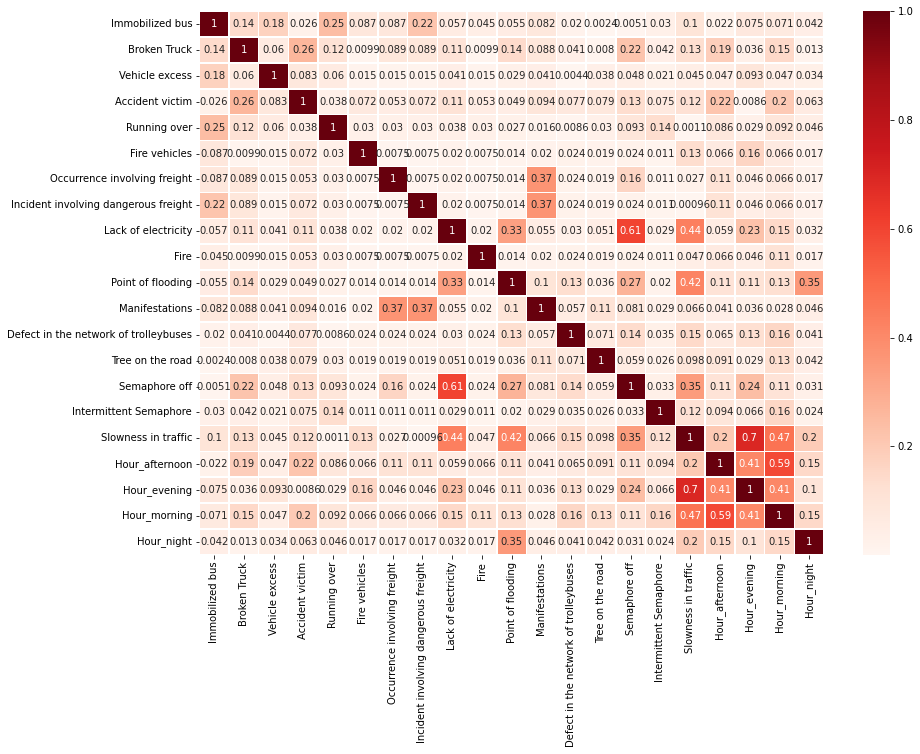

In [158]:
plt.figure(figsize = (14, 10))
sns.heatmap(data.corr().abs(), cmap='Reds',annot=True, linewidths=0.5)
plt.show()

In [159]:
X_new = data[['Hour_afternoon', 'Hour_evening', 'Hour_morning', 'Hour_night', 'Semaphore off', 'Lack of electricity', 'Point of flooding']]
y = data['Slowness in traffic']

In [160]:
X_new.head()

,Hour_afternoon,Hour_evening,Hour_morning,Hour_night,Semaphore off,Lack of electricity,Point of flooding
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [161]:
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2)

In [162]:
poly=PolynomialFeatures(degree=1)
X_new_train_poly=poly.fit_transform(X_new_train)
model2=LinearRegression()
model2.fit(X_new_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
X_new_test_poly=poly.fit_transform(X_new_test)
y_pred2=model2.predict(X_new_test_poly)

In [164]:
r2=r2_score(y_test,y_pred2)

print(f"\nR2 Score (Polynomial Regression): {r2}")


R2 Score (Polynomial Regression): 0.5872568132659285


#Classification Metrics: 




In [166]:
data = pd.read_csv("https://raw.githubusercontent.com/ramahanisha-7/Datasets/main/claasify.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [168]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [169]:
X = data.iloc[:,:-1].values  
y = data.iloc[:,-1].values  

In [170]:
data.describe()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [171]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [172]:
#Train test split 
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0,
    shuffle=False)

In [174]:
#perceptron
#X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
Perceptron()
z=clf.score(X_train, y_train)
print(f"\nThe accuracy using perceptron model is : {z}")


The accuracy using perceptron model is : 0.7735849056603774


In [175]:
model = LogisticRegression()

In [176]:
model = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [177]:
y_pred = model.predict(X_test)

In [178]:
test_accuracy_sklearn = accuracy_score(y_test, y_pred)
test_accuracy_sklearn

0.6153846153846154

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        91
           1       0.00      0.00      0.00         0

    accuracy                           0.62        91
   macro avg       0.50      0.31      0.38        91
weighted avg       1.00      0.62      0.76        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[56, 35],
       [ 0,  0]])

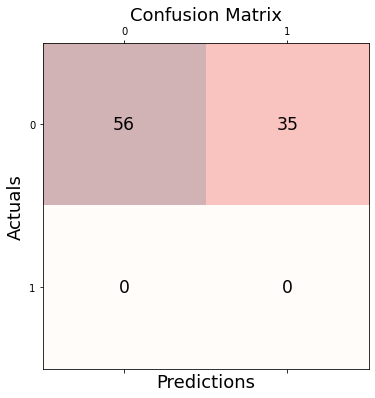

In [181]:
fig, ax= plt.subplots(figsize=(6, 6))
ax.matshow(conf_mat, cmap = 'Reds', alpha=0.3 )
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()